In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **How do we treat outliers?**
> * Trimming
* Capping
* Treating as missing values
* Discretization od the data

## **Techniques for outlier detection and removal**
> * Z-score treatment 
* IQR based filtering 
* Percentile based filtering
* Winsorization

In [ ]:
from sklearn.datasets import fetch_california_housing

def load_data():
  data = fetch_california_housing()
  return data

In [ ]:
data = load_data()

In [ ]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = data.target

In [ ]:
df.head(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413


In [ ]:
def plot_dist(data):
  sns.kdeplot(data)
  plt.show()

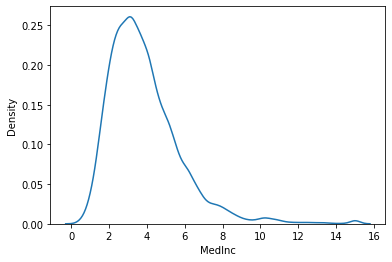

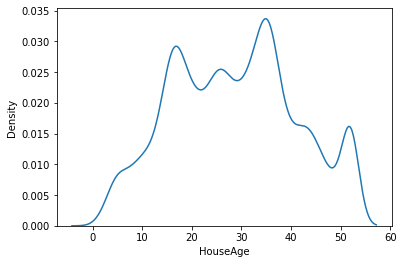

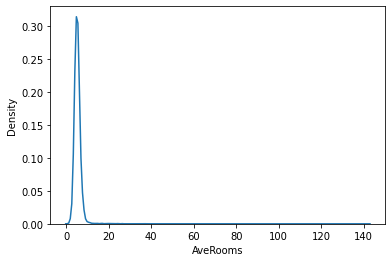

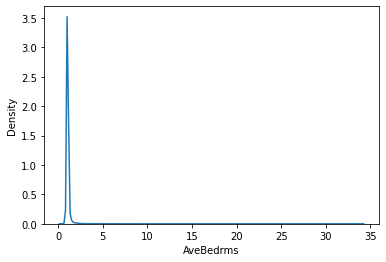

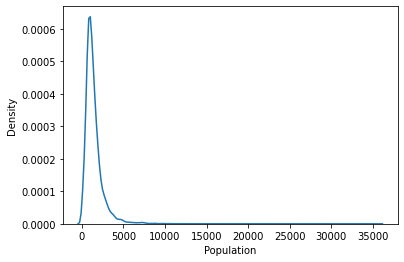

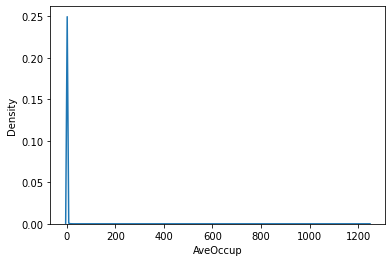

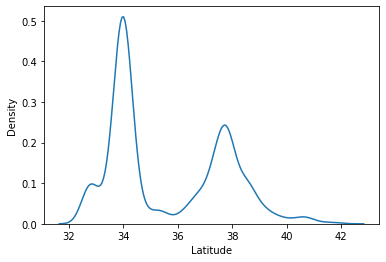

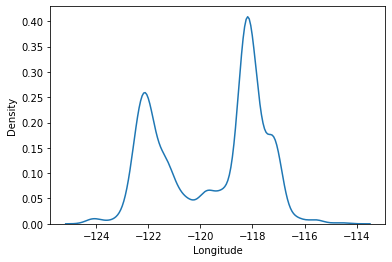

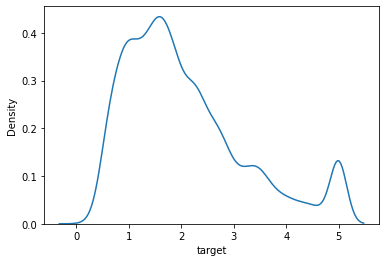

In [ ]:
for col in df.columns:
  plot_dist(df[col])
  print()

### **Z-score treatment**
* Calculate the Z-score for the data and reject the data lying outside 3 standard deviations.
* Z-score in the range (-3,3) is accepted.
* Z = (Xi-U)/std
* Either trimming or capping is done.

(20640, 9) (20332, 9)


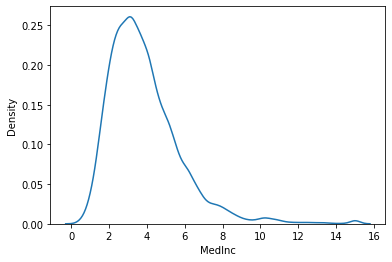

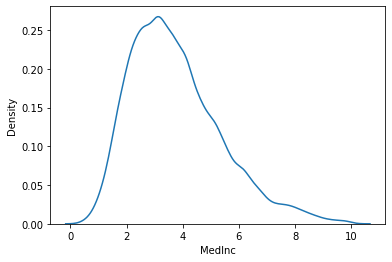

In [ ]:
# Use of Z-score for trimming/capping is not very useful for skewed distributions. It is useful in case of normal distributions.

# Trimming
new_df = df[df['MedInc']<=10]
print(df.shape,new_df.shape)

plot_dist(df['MedInc'])
plot_dist(new_df['MedInc'])

In [ ]:
# Capping using Z-score

# HouseAge column

mean,std = df['MedInc'].mean(),df['MedInc'].std()
upper_limit = mean+3*std
lower_limit = mean-3*std

upper_limit,lower_limit

(9.570136156742844, -1.828794150928795)

In [ ]:
df['MedInc_new'] = np.where(df['MedInc']>upper_limit,upper_limit,np.where(df['MedInc']<lower_limit,lower_limit,df['MedInc']))

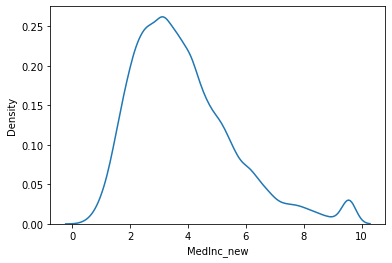

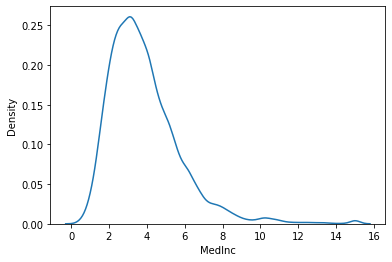

In [ ]:
plot_dist(df['MedInc_new'])
plot_dist(df['MedInc'])

### **IQR-based filtering**
* Data in the range (Q1-1.5*IQR - Q3+1.5*IQR) are kept.
* Box plot is visualized.
* Useful in case of skewed distributions.

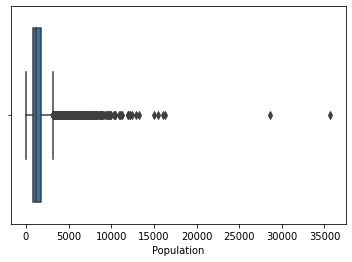

In [ ]:
sns.boxplot(x = df['Population'])
plt.show()

In [ ]:
# Calculating the IQR

percentile25 = df['Population'].quantile(0.25)
percentile75 = df['Population'].quantile(0.75)

IQR = percentile75-percentile25

upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR

upper_limit,lower_limit

(3132.0, -620.0)

In [ ]:
new_df = df[df['Population']<=upper_limit]

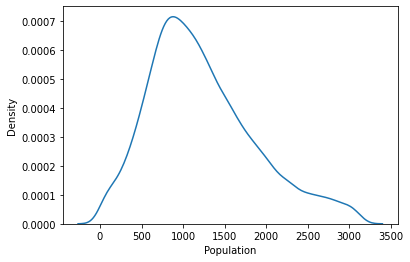

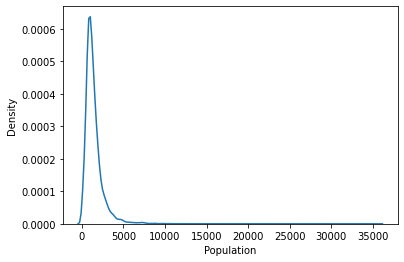

In [ ]:
plot_dist(new_df['Population'])
print()
plot_dist(df['Population'])

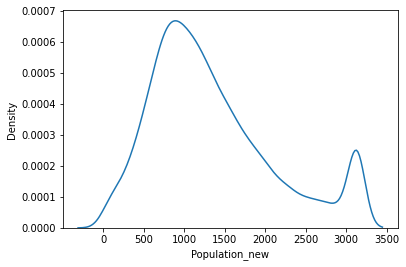

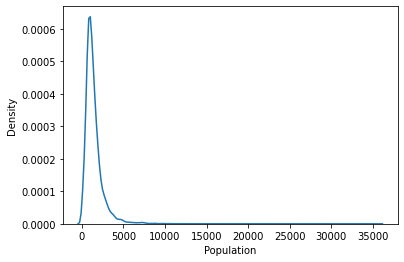

In [ ]:
# Capping

df['Population_new'] = np.where(df['Population']>upper_limit,upper_limit,np.where(df['Population']<lower_limit,lower_limit,df['Population']))
plot_dist(df['Population_new'])
plot_dist(df['Population'])

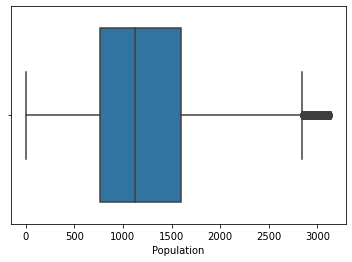

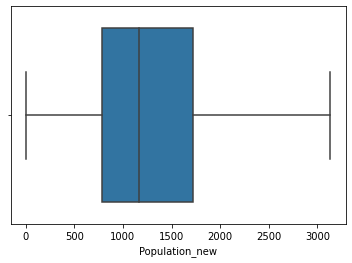

In [ ]:
sns.boxplot(x=new_df['Population'])
plt.show()
sns.boxplot(x=df['Population_new'])
plt.show()

### **Percentage based filtering**
> * Capping in case of this technique is called Winsorization

In [ ]:
# Trimming

percentile1 = df['Population'].quantile(0.01)
percentile99 = df['Population'].quantile(0.99)

new_df = df[(df['Population']<percentile99) & (df['Population']>percentile1)]
new_df.shape,df.shape

((20223, 12), (20640, 12))

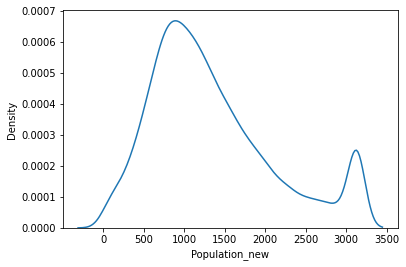

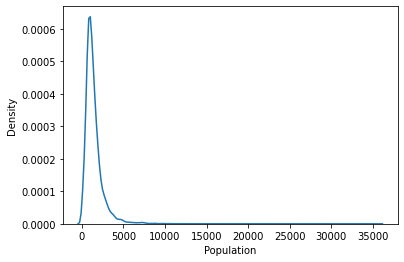

In [ ]:
# Capping

df['Population_new'] = np.where(df['Population']>upper_limit,upper_limit,np.where(df['Population']<lower_limit,lower_limit,df['Population']))
plot_dist(df['Population_new'])
plot_dist(df['Population'])